In [1]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris=sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


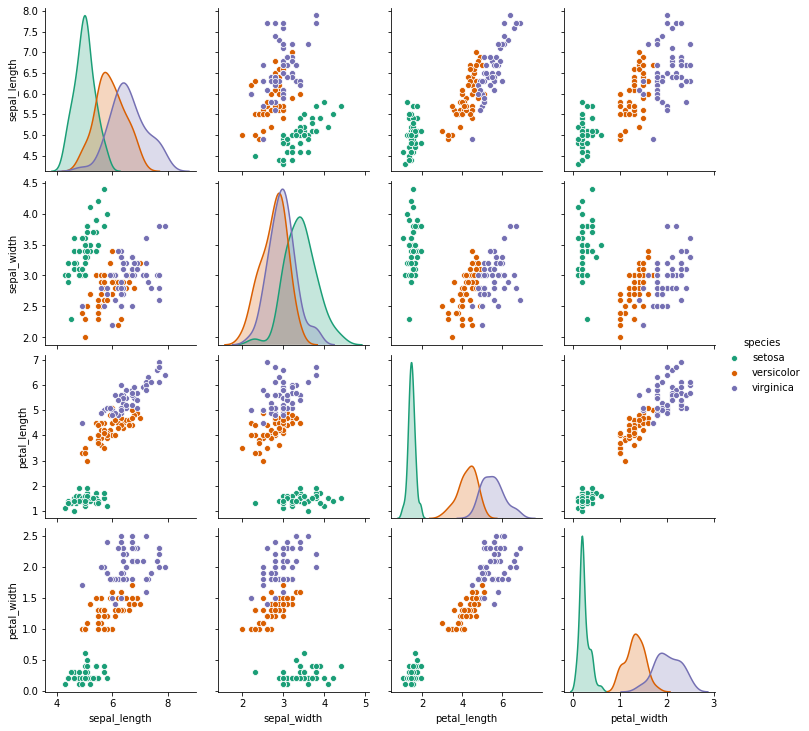

In [3]:
sns.pairplot(data=iris,hue='species',palette='Dark2')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

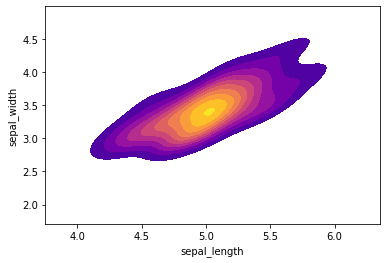

In [4]:
seto=iris[iris['species']=='setosa']
sns.kdeplot(seto['sepal_length'],seto['sepal_width'],cmap='plasma',shade=True,shade_lowest=False)

In [5]:
from sklearn.model_selection import train_test_split#train test split
X=iris.drop('species',axis=1)

y=iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

  

In [6]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
pre=svc.predict(X_test)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pre))
print(classification_report(y_test,pre))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [8]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,0.01,1,10,100,1000,10000],'gamma':[10,1,0.1,0.001,0.0001,0.00001,0.000001]}
gsv=GridSearchCV(svc,param_grid,verbose=3)

In [9]:
gsv.fit(X_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.381, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.381, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.571, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.524, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.619, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.857, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.714, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.857, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................. C=0.01, gamma=1e-06, score=0.714, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.857, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.857, total=   0.1s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.905, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.810, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.905, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=1.000, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] ................... C=10, gamma=1e-05, score=0.333, total=   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ................... C=10, gamma=1e-05, score=0.333, total=   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ................... C=10, gamma=1e-05, score=0.714, total=   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ................... C=10, gamma=1e-05, score=0.714, total=   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ................... C=10, gamma=1e-05, score=0.714, total=   0.0s
[CV] C=10, gamma=1e-06 ...............................................
[CV] ................... C=10, gamma=1e-06, score=0.333, total=   0.0s
[CV] C=10, gamma=1e-06 ...............................................
[CV] ................... C=10, gamma=1e-06, score=0.333, total=   0.0s
[CV] C=10, gamma=1e-06 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.905, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.952, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.905, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.905, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    7.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000, 10000],
                         'gamma': [10, 1, 0.1, 0.001, 0.0001, 1e-05, 1e-06]},
             verbose=3)

In [10]:
gsv.best_params_

{'C': 1, 'gamma': 0.1}

In [11]:
pri=gsv.predict(X_test)
print(confusion_matrix(y_test,pri))
print(classification_report(y_test,pri))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

